In [1]:
from BEC.bosonstar import get_profiles,get_compactness,get_density, scan

In [2]:
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
np.set_printoptions(precision=4,suppress=False)

/home/vagie/ouhep8/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Overview

bosontstar.py extends the relaxation_method module. It also contains 4 useful functions to call bosonstar called get_profiles, get_compactness, get_density, and scan

- get_profiles: returns the radius r and a matrix y which containts the profiles of the scalar fields and the metric. $A = y(0,:)$, $\Phi_{1}$ = y(1,:), $\Phi_{2}$ = y(2,:), $\frac{d \Phi_1}{dr}$ = y(3,:), $\frac{d \Phi_2}{dr}$ = y(4,:), $B$ = y(5,:), $\mu_1$ = y(6,:), $\mu_2$ = y(7,:).  It also returns the object from the relaxation_method. 

- get_compactness: returns the compactness and total mass of the boson star  

- get_density: returns the dimensionless central density and radius 

- scan: clean way to do multiprocessing.  Number cores = min(input, length of values). Returns dictionary results of the inital conditions of the phi fileds, mass, compactness, mass and compactness of just the second phi field contribution, central radius and central density. 


# Main inputs

The main inputs are the couplings, masses of the two scalar fields, and fr which corresponds to the decay scale. fr is used to calculate the dimensionless couplings used in the code.  

In [3]:
m1 = 1e-10
mr = 1
kwargs = dict(lam1=1,lam2=1,lam12=1,m1=m1,m2=mr*m1,fr=1e17)

# Plot profiles from get_profiles
-input is the central density of the first scalar field followed by the seconde and the kwargs 

-prints results from get_compactness and shows that you can have accesses to the object of the class returned by get_profiles.  It inherets self from the bosonstar module and relaxation_method. 

time = 0.138296
lambda = 1186.16
C = 0.000622172
M = 0.101293


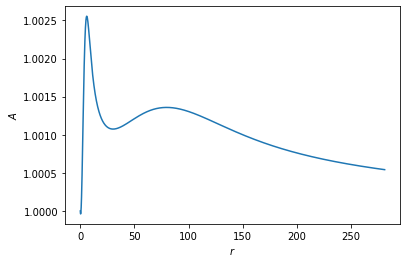

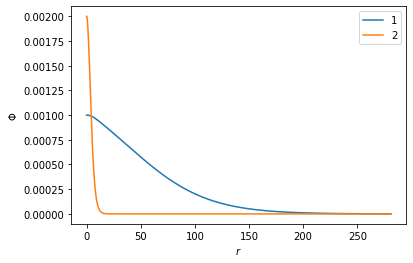

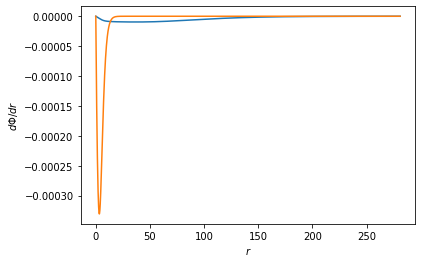

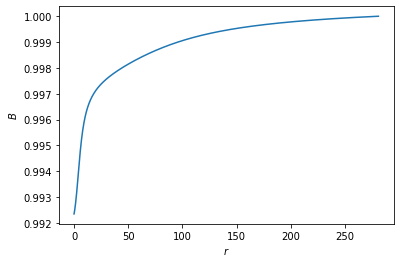

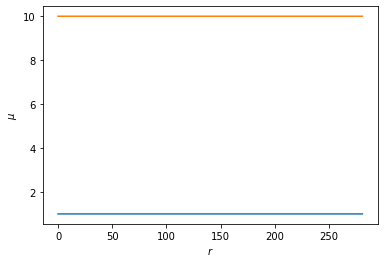

In [4]:
kwargs = dict(lam1=1,
              lam2=1,
              lam12=1,
              m1=1e-10,
              m2=1e-10,
              fr=1e17,
              max_grid=1000,
              tol=100,
)
from time import time

s = time()
x,y,res = get_profiles(1e-3,2e-3,**kwargs)
f = time()
print('time = %g'%((f - s)/60.))

print("lambda = %g"%res.lam1)
C,M = get_compactness(x,y,res)
rc,rho = get_density(x,y,res)
print("C = %g"%C)
print("M = %g"%M)

plt.xlabel('$r$'); plt.ylabel(r'$A$')
plt.plot(x,y[0,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$\Phi$')
plt.plot(x,y[1,:],x,y[2,:])
plt.legend(["1","2"])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$d\Phi / dr$')
plt.plot(x,y[3,:],x,y[4,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$B$')
plt.plot(x,y[5,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$\mu$')
plt.plot(x,y[6,:],x,y[7,:])
plt.show()

# Scan 

Perform linear scan over central densities and plot the compactness vs total mass. Results is a dictionary that contains "Cbs", "Mbs", "Phi1c", "Phi2c", "Rc","Rhoc","M2bs","C2bs". Number of cores is specified by cores = #.  If # is less than length of the phis input then the number of cores will be set to the length of the phis. 

In [6]:
res = []
kwargs = {'lam1':1,
          'lam2':1,
          'lam12':1,
          'm1':1e-10,
          'm2':0.5*1e-10,
          'fr':1e17,
          'max_grid':1000,
          'tol':1,
}
for p0 in [0, 1e-7, 1e-5, 1e-3]:
    phi2 = 10**(np.linspace(np.log10(1e-8),np.log10(8e-2),52))        
    phi1 = p0*np.ones_like(phi2)
    phis = np.column_stack((phi1,phi2))
    results = pd.DataFrame(scan(phis,cores=8,**kwargs))
    res.append(results)  
phi1 = 10**(np.linspace(np.log10(1e-8),np.log10(8e-2),52))        
phi2 = 0*phi1[:]
phis = np.column_stack((phi1,phi2))
res0 = pd.DataFrame(scan(phis,cores=8,**kwargs))

KeyboardInterrupt: 

In [ ]:
df = pd.concat(d for d in res)
df0 = res0.copy(deep=True)
df['phi1c'] = df['phi1c'].map(lambda x: '%.1e'%x if x > 1e-10 else '0') 
df0['phi2c'] = df0['phi2c'].map(lambda x: '%.1e'%x if x > 1e-10 else '0') 
df.head()

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(data=df0,
                x="Cbs",
                y="Mbs",
                color="magenta",
                lw=1,
                ax=ax,
                sort=False)
lgnd = plt.legend(["0"],
                  title="phi2c",
                  loc=(0.28,0.80))
ax.add_artist(lgnd)
sns.lineplot(data=df,
                x="Cbs",
                y="Mbs",
                hue="phi1c",
                lw=1,
                ax=ax,
                sort=False)
ax.set(xscale="log",yscale="log")
plt.show()


In [ ]:
fig,ax = plt.subplots()
sns.lineplot(data=df0,
                x="Rc",
                y="Rhoc",
                color="magenta",
                lw=1,
                ax=ax,
                sort=False)
lgnd = plt.legend(["0"],
                  title="phi2c",
                  loc=(0.58,0.80))
ax.add_artist(lgnd)
sns.lineplot(data=df,
                x="Rc",
                y="Rhoc",
                hue="phi1c",
                lw=1,
                ax=ax,
                sort=False)
ax.set(xscale="log",yscale="log")
plt.show()